In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

In [8]:
def plot_img(img):
  plt.figure(figsize=(20, 20))
  plt.axis('off')
  plt.imshow(img)

In [9]:
man_img = cv.cvtColor(cv.imread('photos/man.png'), cv.COLOR_BGR2RGB)
car_img = cv.cvtColor(cv.imread('photos/car.png'), cv.COLOR_BGR2RGB)

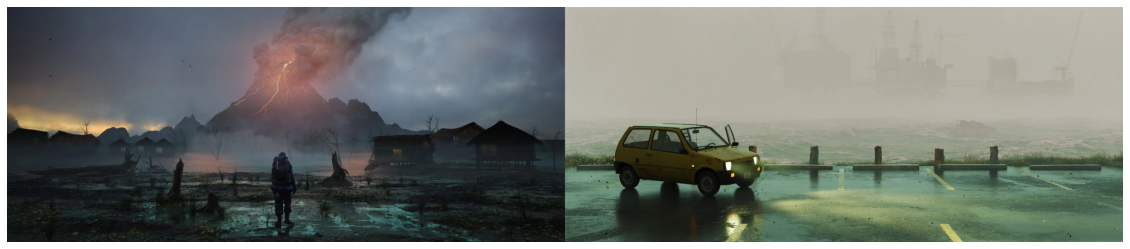

In [10]:
plot_img(np.hstack([man_img, car_img]))

In [11]:
def hamming_distance_norm(l1: list, l2: list):
  if len(l1) != len(l2):
    return -1
  return sum(el1 != el2 for el1, el2 in zip(l1, l2)) / len(l1)

In [12]:
def custom_match_orb(train, query):
  surf = cv.ORB_create()
  kp1, des1 = surf.detectAndCompute(cv.cvtColor(train, cv.COLOR_BGR2GRAY), None)
  kp2, des2 = surf.detectAndCompute(cv.cvtColor(query, cv.COLOR_BGR2GRAY), None)

  matches = []
  for i, d1 in enumerate(des1, start=0):
      for j, d2 in enumerate(des2, start=0):
          matches.append(cv.DMatch(_trainIdx=j, _queryIdx=i, _distance=hamming_distance_norm(d1, d2), _imgIdx=0))

  matches = sorted(matches, key=lambda x:x.distance)

  return cv.drawMatches(train, kp1, query, kp2, matches[:10], None, flags=2)

def bf_match_orb(train, query):
  surf = cv.ORB_create()
  kp1, des1 = surf.detectAndCompute(cv.cvtColor(train, cv.COLOR_BGR2GRAY), None)
  kp2, des2 = surf.detectAndCompute(cv.cvtColor(query, cv.COLOR_BGR2GRAY), None)

  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1,des2)
  matches = sorted(matches, key = lambda x:x.distance)

  return cv.drawMatches(train, kp1, query, kp2, matches[:10], None, flags=2)

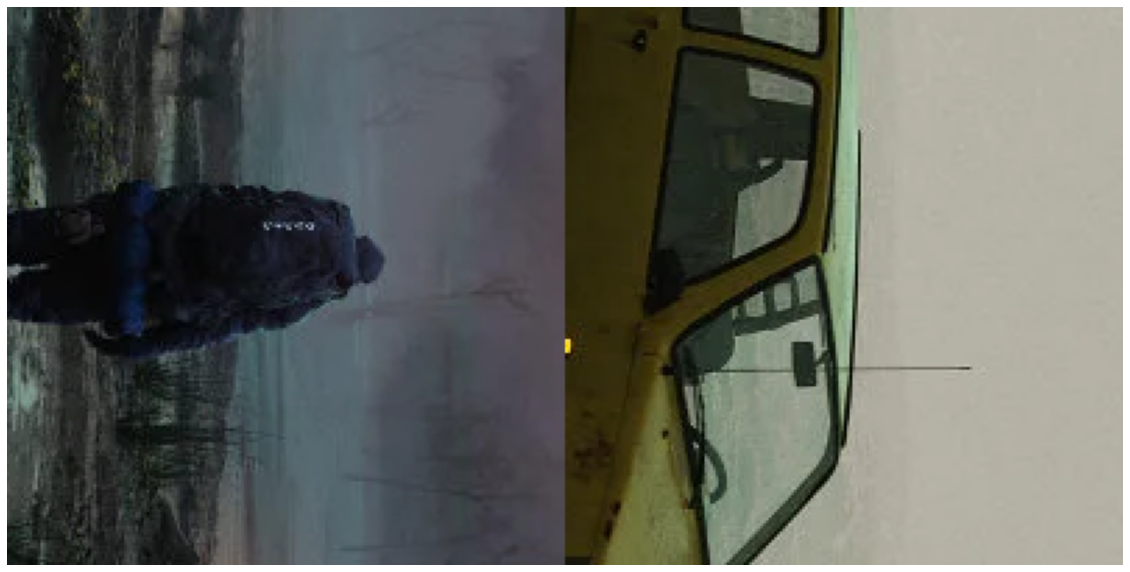

In [16]:
query_man = cv.rotate(man_img[300:500, 600:800], cv.ROTATE_90_CLOCKWISE)
query_car = cv.rotate(car_img[200:400, 200:400], cv.ROTATE_90_CLOCKWISE)

plot_img(np.hstack([query_man, query_car]))

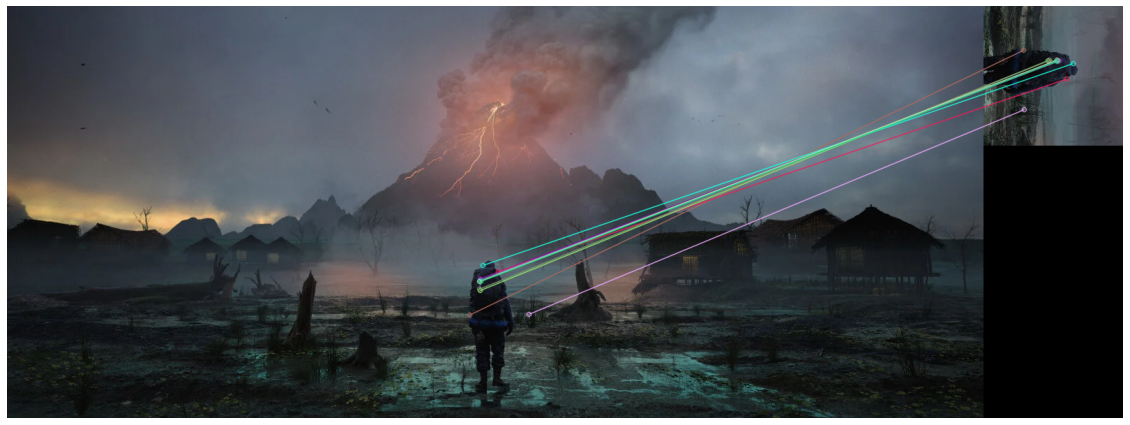

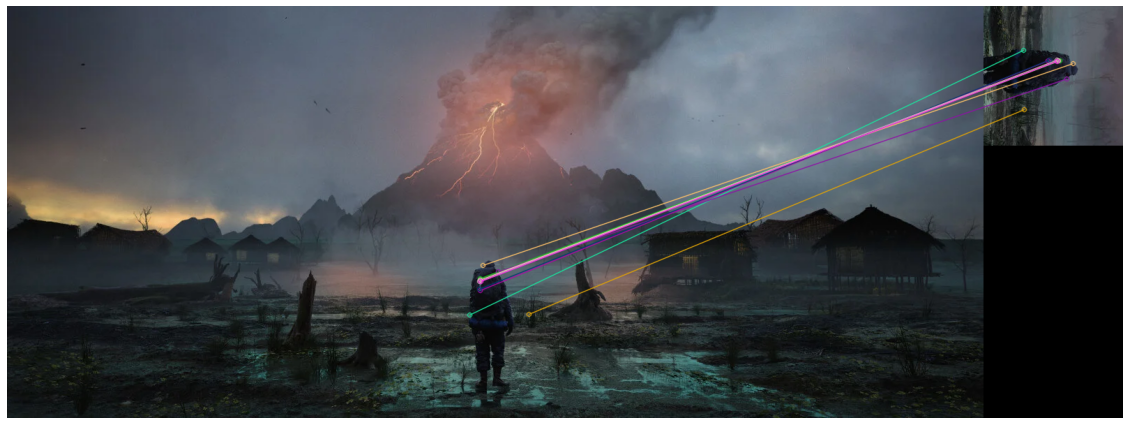

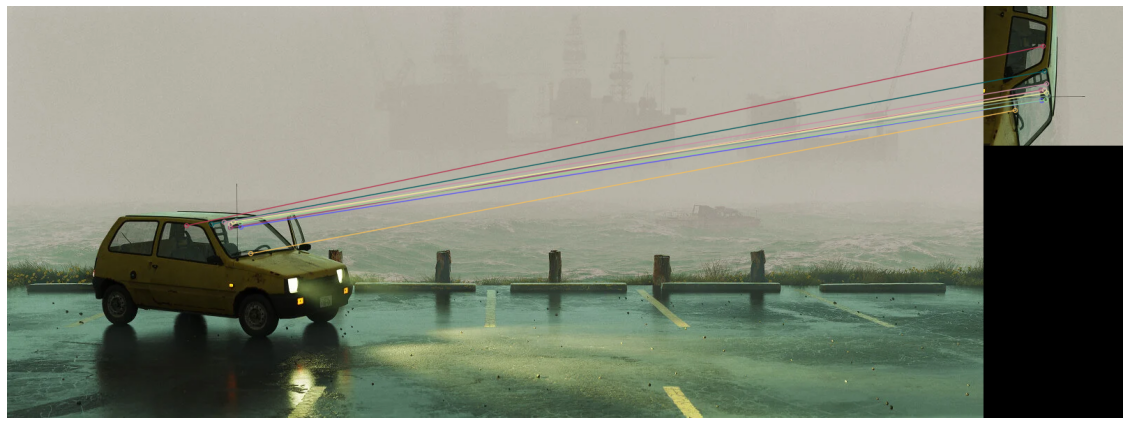

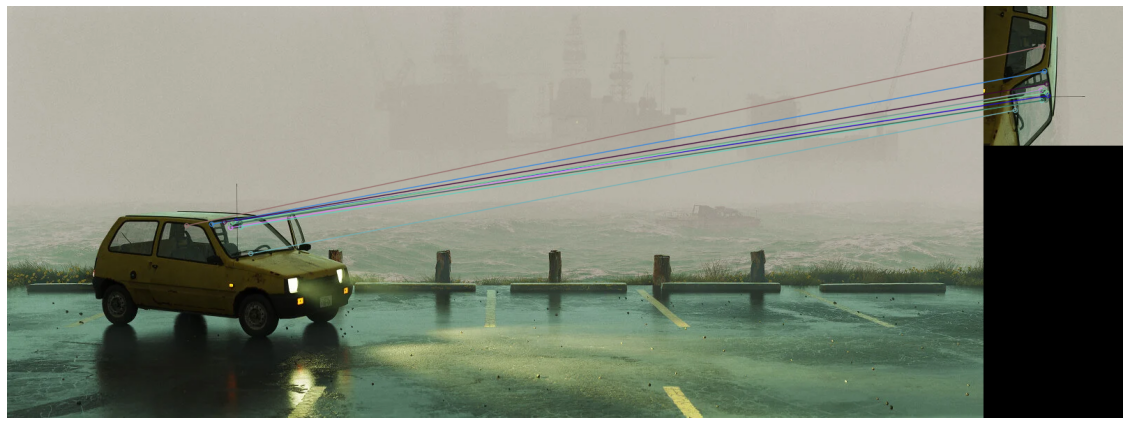

In [18]:
plot_img(custom_match_orb(man_img, query_man))
plot_img(bf_match_orb(man_img, query_man))
plot_img(custom_match_orb(car_img, query_car))
plot_img(bf_match_orb(car_img, query_car))

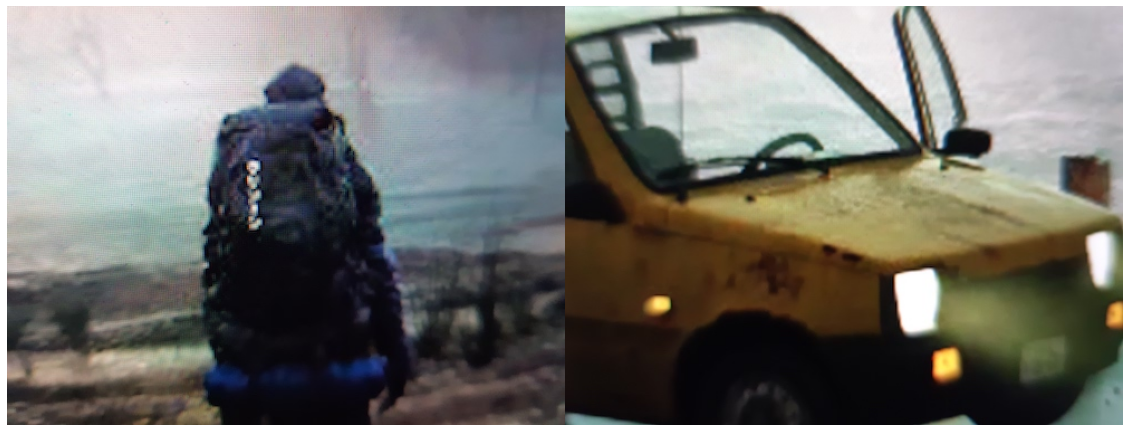

In [19]:
man_photo = cv.cvtColor(cv.imread('photos/man_photo.jpg'), cv.COLOR_BGR2RGB)
car_photo = cv.cvtColor(cv.imread('photos/car_photo.jpg'), cv.COLOR_BGR2RGB)
plot_img(np.hstack([man_photo, car_photo]))

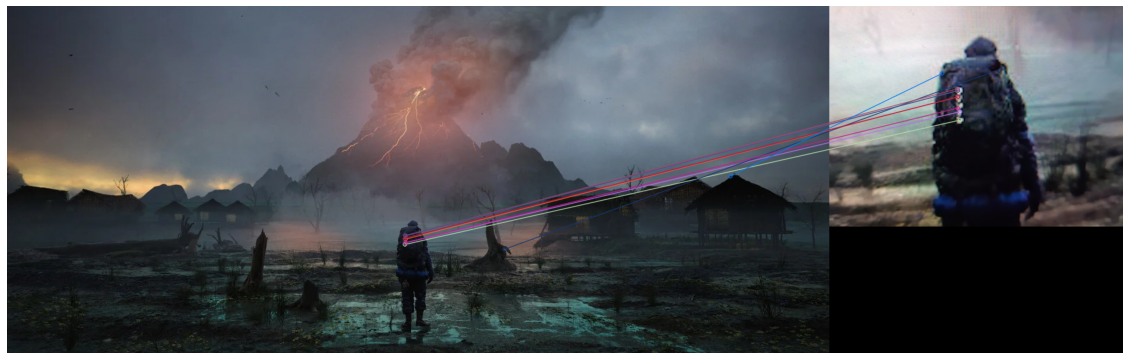

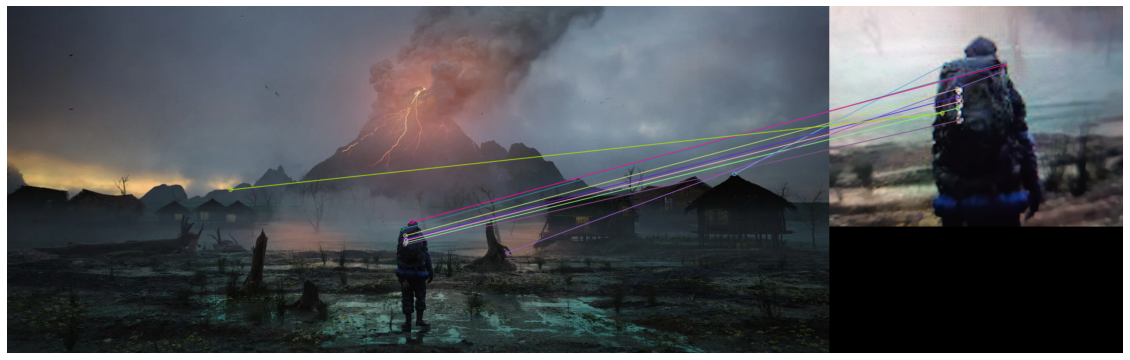

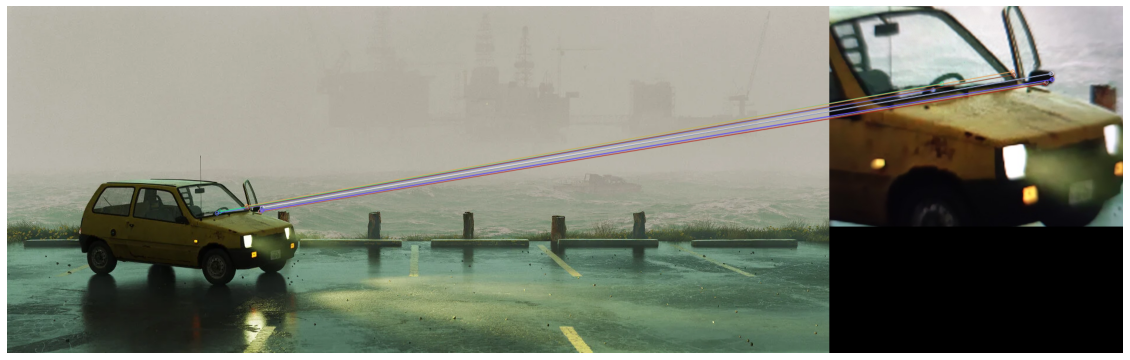

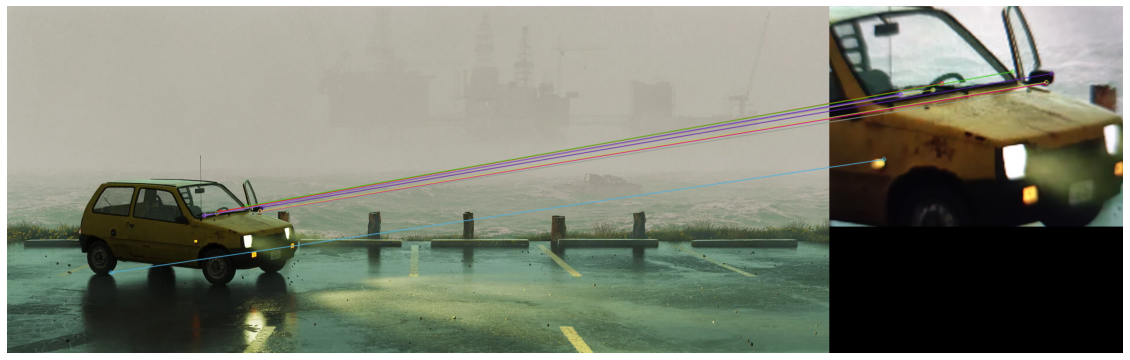

In [20]:
plot_img(custom_match_orb(man_img, man_photo))
plot_img(bf_match_orb(man_img, man_photo))
plot_img(custom_match_orb(car_img, car_photo))
plot_img(bf_match_orb(car_img, car_photo))